# Predictive Modeling: Multiple Linear Regression
## Jessica Schmidt

# Part I: Research Question
## A1. The Research Question
The research question for this Multiple Linear Regression (MLR) is "What factors are associated with the length of patients' initial hospitalization?"

## A2. Goals of the Analysis
The goal of this multiple linear regression is to test which variables are most closely correlated to patients’ length of hospital stay ("Initial_days"). The independent variables chosen for this MLR are Age, Number of doctor visits (“Doc_visits”), Vitamin D levels (“VitD_levels”), Number of full meals eaten (“Full_meals_eaten”), Vitamin D supplements (“VitD_supp”), High blood pressure (“HighBlood”), Overweight ("Overweight"), Anxiety ("Anxiety"), Reflux esophagitis (“Reflux_esophagitis”), Back pain (“BackPain”), Hyperlipidemia ("Hyperlipidemia"), Stroke ("Stroke"), and Arthritis ("Arthritis").

# Part II: Method Justification
## B1. Four Assumptions of a MLR Model
The first assumption of a MLR is that the target/dependent variable is a continuous variable, whereas the independent variables can be continuous or categorical in nature. Second, for MLR, there are multiple independent variables (aka “predictor variables”) and one dependent variable (aka the “target variable”). Third, there is expected to be a linear relationship between the independent variables and the dependent variable. Finally, the independent variables should not be too highly correlated with one another. (Source: D208 Course Webinars)

## B2. Two Benefits of Using Python
I have chosen to use Python for this Multiple Linear Regression because Python has many useful packages/libraries specifically for data science and machine learning processes (i.e., scikit-learn). As Multiple Linear Regression is a known “Structured Learning” process, Python’s machine learning and data science packages will be highly appropriate. Also, Python’s syntax is simple and concise when performing regression analyses, making it highly readable and easy to understand. (Source: D208 Course Textbook)

## B3. Why Linear Regression is Appropriate for the Research Question
Linear Regression is appropriate for my research question because the dependent variable is a continuous numeric variable (days of initial hospitalization). Also, Linear Regression makes the most sense for my research question because it can be used to test the multiple independent variables regardless of whether they are continuous or categorical assuming they are correlated to the dependent variable of days of hospitalization. (Source: D208 Course Textbook)

# Part III: Data Preparation
## C1. Data Cleaning: Goals and Steps Used (Source: D206 Course Webinars)
Before beginning the MLR, it is imperative that we have cleaned and prepared the data for analysis. To do so, we will detect and treat duplicates, missing values, and outliers, as well as make necessary changes as appropriate such as re-expression of categorical variables.
	
- Detecting Duplicates Code Used: 
med_data.duplicated()
print(med_data.duplicated().value_counts())
Result: No duplicates detected.
	
- Detecting Missing Values Code Used:
med_data.isnull().sum()
Result: No missing values detected.

- Dealing with Outliers Code Used (for every quantitative independent variable chosen for MLR – example is only for age variable):
med_data['z_score_age']=stats.zscore(med_data['Age'])
med_data[['Age','z_score_age']].head
plt.hist(med_data['z_score_age'])
boxplot=sns.boxplot(x='Age',data=med_data)
Result: Outliers detected.


### Getting Started: Importing packages, importing csv file, preliminary examination of dataset

In [1]:
# Importing Relevant Packages

# Standard imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistical packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [2]:
# Import CSV file
med_data = pd.read_csv('/Users/astro/Downloads/medical_clean.csv')

In [3]:
# Examine the data
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Print the header
med_data.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Data Cleaning and Preparation

In [5]:
# Detecting Duplicates
# No Duplicates Detected
med_data.duplicated()
print(med_data.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
# Detecting Missingness
# No Missing Values Detected
med_data.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# Detecting outliers for Age variable
# No outliers present
med_data['z_score_age']=stats.zscore(med_data['Age'])
med_data[['Age','z_score_age']].head

<bound method NDFrame.head of       Age  z_score_age
0      53    -0.024795
1      51    -0.121706
2      53    -0.024795
3      78     1.186592
4      22    -1.526914
...   ...          ...
9995   25    -1.381548
9996   87     1.622691
9997   45    -0.412438
9998   43    -0.509349
9999   70     0.798948

[10000 rows x 2 columns]>

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([-1.72073600e+00, -1.37670219e+00, -1.03266837e+00, -6.88634559e-01,
        -3.44600744e-01, -5.66928963e-04,  3.43466886e-01,  6.87500701e-01,
         1.03153452e+00,  1.37556833e+00,  1.71960215e+00]),
 <BarContainer object of 10 artists>)

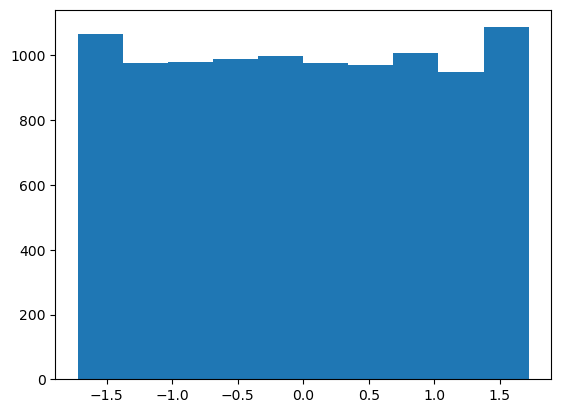

In [8]:
plt.hist(med_data['z_score_age'])

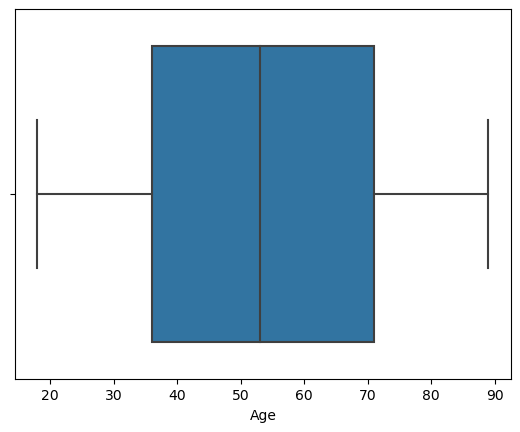

In [9]:
boxplot=sns.boxplot(x='Age',data=med_data)

In [10]:
# Detecting outliers via z-scores for Doc_visits variable
# No outliers present
med_data['z_score_doc_visits']=stats.zscore(med_data['Doc_visits'])
med_data[['Doc_visits','z_score_doc_visits']].head

<bound method NDFrame.head of       Doc_visits  z_score_doc_visits
0              6            0.944647
1              4           -0.967981
2              4           -0.967981
3              4           -0.967981
4              5           -0.011667
...          ...                 ...
9995           4           -0.967981
9996           5           -0.011667
9997           4           -0.967981
9998           5           -0.011667
9999           5           -0.011667

[10000 rows x 2 columns]>

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([-3.83692119, -3.07187036, -2.30681952, -1.54176869, -0.77671786,
        -0.01166703,  0.75338381,  1.51843464,  2.28348547,  3.04853631,
         3.81358714]),
 <BarContainer object of 10 artists>)

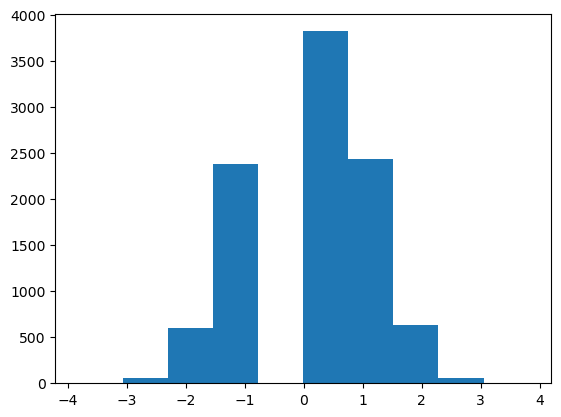

In [11]:
plt.hist(med_data['z_score_doc_visits'])

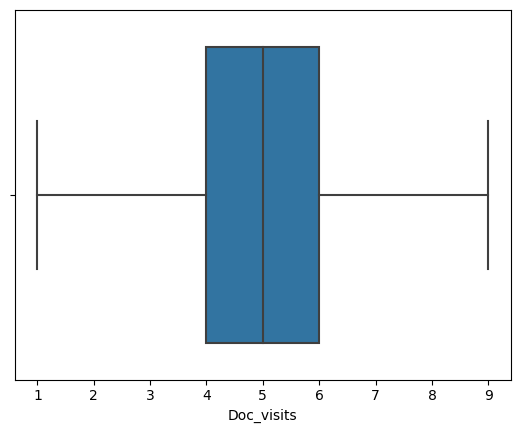

In [12]:
boxplot=sns.boxplot(x='Doc_visits',data=med_data)

In [13]:
# Detecting outliers for VitD_levels variable
# Outliers are present and will be retained
med_data['z_score_vitd']=stats.zscore(med_data['VitD_levels'])
med_data[['VitD_levels','z_score_vitd']].head

<bound method NDFrame.head of       VitD_levels  z_score_vitd
0       19.141466      0.583603
1       18.940352      0.483901
2       18.057507      0.046227
3       16.576858     -0.687811
4       17.439069     -0.260366
...           ...           ...
9995    16.980860     -0.487525
9996    18.177020      0.105476
9997    17.129070     -0.414049
9998    19.910430      0.964820
9999    18.388620      0.210377

[10000 rows x 2 columns]>

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([-4.04424997, -3.22189522, -2.39954048, -1.57718573, -0.75483099,
         0.06752375,  0.8898785 ,  1.71223324,  2.53458799,  3.35694273,
         4.17929747]),
 <BarContainer object of 10 artists>)

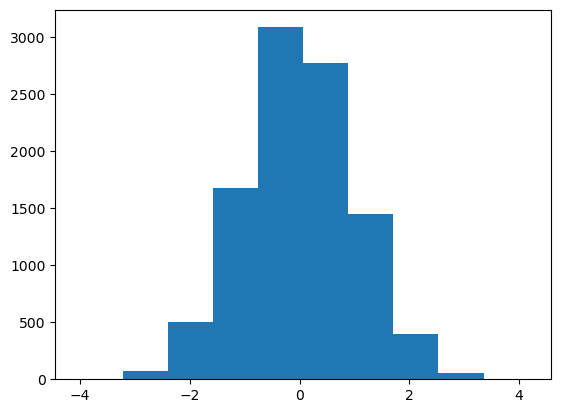

In [14]:
plt.hist(med_data['z_score_vitd'])

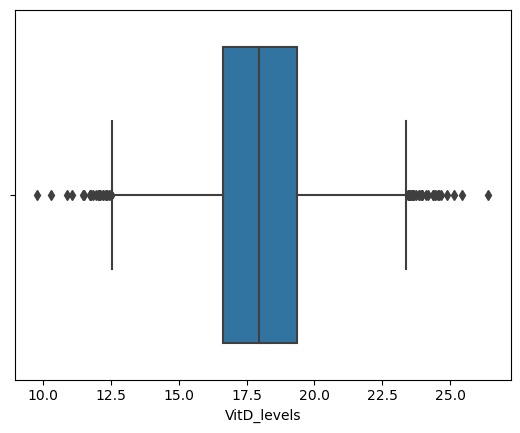

In [15]:
boxplot=sns.boxplot(x='VitD_levels',data=med_data)

In [16]:
# Detecting outliers for VitD_supp variable
# Outliers are present and will be retained
med_data['z_score_vitd_supp']=stats.zscore(med_data['vitD_supp'])
med_data[['vitD_supp','z_score_vitd_supp']].head

<bound method NDFrame.head of       vitD_supp  z_score_vitd_supp
0             0          -0.634713
1             1           0.956445
2             0          -0.634713
3             0          -0.634713
4             2           2.547602
...         ...                ...
9995          1           0.956445
9996          0          -0.634713
9997          0          -0.634713
9998          1           0.956445
9999          1           0.956445

[10000 rows x 2 columns]>

(array([6.702e+03, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([-0.63471264,  0.160866  ,  0.95644465,  1.75202329,  2.54760193,
         3.34318058,  4.13875922,  4.93433787,  5.72991651,  6.52549516,
         7.3210738 ]),
 <BarContainer object of 10 artists>)

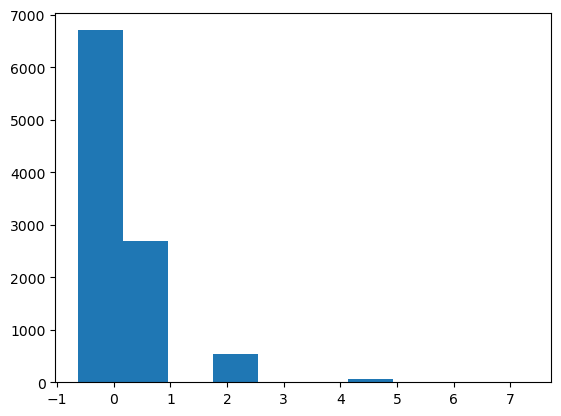

In [17]:
plt.hist(med_data['z_score_vitd_supp'])

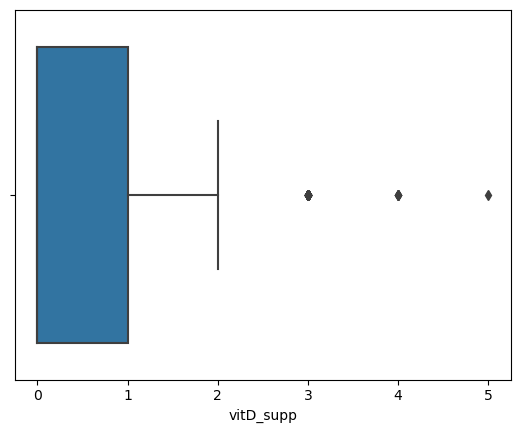

In [18]:
boxplot=sns.boxplot(x='vitD_supp',data=med_data)

In [19]:
# Detecting outliers for Full_meals_eaten variable
# Outliers are present and will be retained
med_data['z_score_meals']=stats.zscore(med_data['Full_meals_eaten'])
med_data[['Full_meals_eaten','z_score_meals']].head

<bound method NDFrame.head of       Full_meals_eaten  z_score_meals
0                    0      -0.993387
1                    2       0.990609
2                    1      -0.001389
3                    1      -0.001389
4                    0      -0.993387
...                ...            ...
9995                 2       0.990609
9996                 0      -0.993387
9997                 2       0.990609
9998                 2       0.990609
9999                 0      -0.993387

[10000 rows x 2 columns]>

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([-0.99338686, -0.29898822,  0.39541043,  1.08980907,  1.78420771,
         2.47860636,  3.173005  ,  3.86740364,  4.56180229,  5.25620093,
         5.95059957]),
 <BarContainer object of 10 artists>)

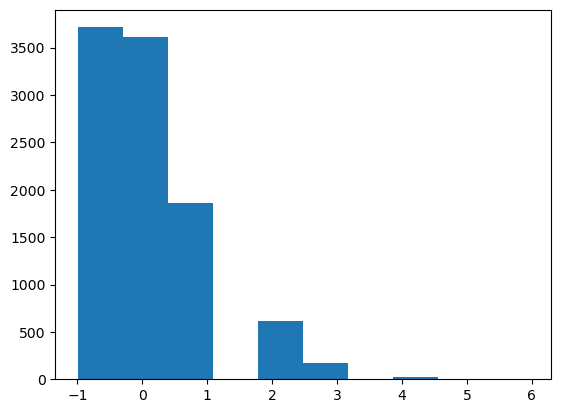

In [20]:
plt.hist(med_data['z_score_meals'])

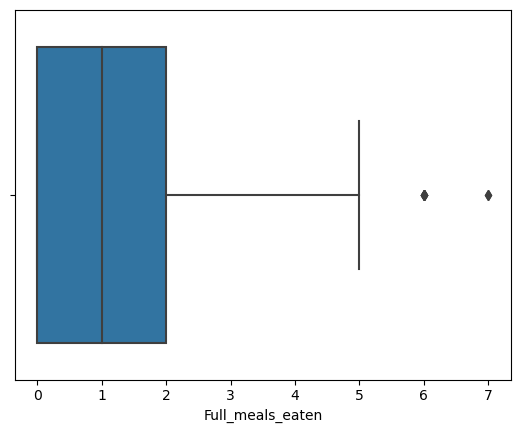

In [21]:
boxplot=sns.boxplot(x='Full_meals_eaten',data=med_data)

In [22]:
# Detecting outliers for Initial_days variable
# No outliers present
med_data['z_score_initial_days']=stats.zscore(med_data['Initial_days'])
med_data[['TotalCharge','z_score_initial_days']].head

<bound method NDFrame.head of       TotalCharge  z_score_initial_days
0     3726.702860             -0.907310
1     4193.190458             -0.734595
2     2434.234222             -1.128292
3     2127.830423             -1.244503
4     2113.073274             -1.261991
...           ...                   ...
9995  6850.942000              0.650217
9996  7741.690000              1.300475
9997  8276.481000              1.356958
9998  7644.483000              1.098585
9999  7887.553000              1.383429

[10000 rows x 2 columns]>

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([-1.27160124, -1.00179951, -0.73199778, -0.46219605, -0.19239432,
         0.07740741,  0.34720914,  0.61701087,  0.88681261,  1.15661434,
         1.42641607]),
 <BarContainer object of 10 artists>)

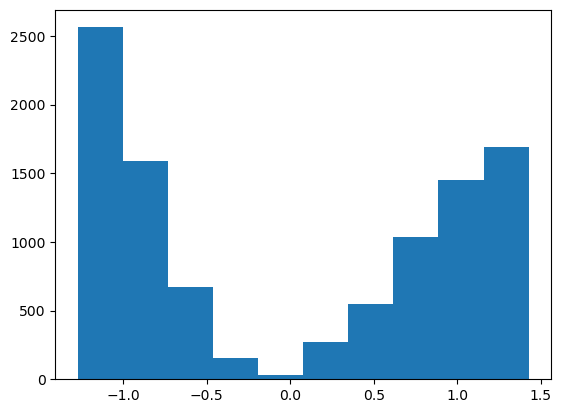

In [23]:
plt.hist(med_data['z_score_initial_days'])

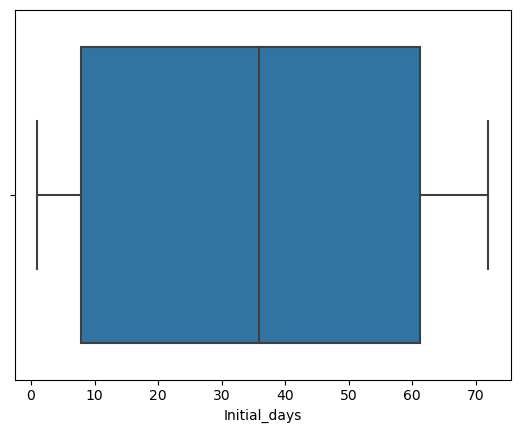

In [24]:
boxplot=sns.boxplot(x='Initial_days',data=med_data)

## C4. Data Transformation (please note this is performed before C2 and C3 for improved visualizations)
The data transformation that was required was limited to the re-expression of categorical variables. These include all of the ordinal variables: High Blood Pressure, Overweight, Anxiety, Reflux Esophagitis, Back Pain, Hyperlipidemia, Stroke, and Arthritis. All of the ordinal variables that were Yes or No values were re-expressed into binary/boolean 1 and 0, respectively.

### Re-Expression of Categorical Variables

In [25]:
# Mapping bools
bool_mapping = {"Yes": 1, "No": 0}

# HighBlood variable
med_data["HighBlood"] = med_data["HighBlood"].map(bool_mapping)

# Overweight variable
med_data["Overweight"] = med_data["Overweight"].map(bool_mapping)

# Anxiety variable
med_data["Anxiety"] = med_data["Anxiety"].map(bool_mapping)

# Reflux_esophagitis variable
med_data["Reflux_esophagitis"] = med_data["Reflux_esophagitis"].map(bool_mapping)

# BackPain variable
med_data["BackPain"] = med_data["BackPain"].map(bool_mapping)

# Hyperlipidemia variable
med_data["Hyperlipidemia"] = med_data["Hyperlipidemia"].map(bool_mapping)

# Stroke variable
med_data["Stroke"] = med_data["Stroke"].map(bool_mapping)

# Arthritis variable
med_data["Arthritis"] = med_data["Arthritis"].map(bool_mapping)

## C2. Dependent and Independent Variables
The dependent/target variable for this MLR is the length in days of initial hospitalization (“Initial_days”, quantitative).

### Summary Statistics (Source: D208 Course Webinars)

- Initial Days. This is our quantitative/continuous dependent variable. As we can see below the average length of initial days hospitalized is 34 days with the maximum nearing 72 days.

In [26]:
med_data['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [27]:
med_data.Initial_days.nlargest(n=20)

7968    71.98149
5326    71.96869
7479    71.96546
6166    71.96415
8066    71.96342
5874    71.96164
5829    71.96134
9159    71.95813
8817    71.95472
7524    71.94732
9074    71.94459
7839    71.92930
9677    71.92647
9221    71.92413
5162    71.92171
9101    71.90712
9766    71.90694
5374    71.90056
6601    71.89863
7214    71.89805
Name: Initial_days, dtype: float64

- Age. This is one of our quantitative independent variables. Here, we can see that the average age of patients is 53.5 years old with the maximum being 89 years old.

In [28]:
med_data['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

- Doctor Visits. This is one of our quantitative independent variables. Here, we can see that the average number of doctor visits a patient receives during hospitalization is 5 with the maximum being 9.

In [29]:
med_data['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

- Vitamin D Levels. This is one of our quantitative independent variables. Here, we can see that the average vitamin d level is nearly 18 with the maximum being near 26. As discussed previously in my D206 PA, these values are within a normal range medically speaking.

In [30]:
med_data['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

- Vitamin D Supplements. This is one of our quantitative independent variables. Here, we can see that the average number of vitamin d supplements a patient receives is 0.39 with the maximum being 5.

In [31]:
med_data['vitD_supp'].describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

- Full Meals Eaten. This is one of our quantitative independent variables. Here, we can see that the average number of meals eaten during hospitalization is 1 with the maximum being 7. Please note that this variable only constitutes full meals eaten and does not include partially eaten meals.

In [32]:
med_data['Full_meals_eaten'].describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

- High Blood Pressure. This is one of our categorical independent variables. Here, we can see that 59% of patients do not have high blood pressure.

In [33]:
med_data['HighBlood'].value_counts()

0    5910
1    4090
Name: HighBlood, dtype: int64

- Overweight. This is one of our categorical independent variables. Here, we can see that nearly 71% of patients are overweight.

In [34]:
med_data['Overweight'].value_counts()

1    7094
0    2906
Name: Overweight, dtype: int64

- Anxiety. This is one of our categorical independent variables. Here, we can see that almost 68% of patients do not have anxiety.

In [35]:
med_data['Anxiety'].value_counts()

0    6785
1    3215
Name: Anxiety, dtype: int64

- Reflux Esophagitis. This is one of our categorical independent variables. Here, we can see that approximately 59% of patients do not have reflux esophagitis.

In [36]:
med_data['Reflux_esophagitis'].value_counts()

0    5865
1    4135
Name: Reflux_esophagitis, dtype: int64

- Back Pain. This is one of our categorical independent variables. Here, we can see that approximately 59% of patients do not have back pain.

In [37]:
med_data['BackPain'].value_counts()

0    5886
1    4114
Name: BackPain, dtype: int64

- Hyperlipidemia. This is one of our categorical independent variables. Here, we can see that 66% of patients do not have hyperlipidemia.

In [38]:
med_data['Hyperlipidemia'].value_counts()

0    6628
1    3372
Name: Hyperlipidemia, dtype: int64

- Stroke. This is one of our categorical independent variables. Here, we can see that 80% of patients have not had a stroke.

In [39]:
med_data['Stroke'].value_counts()

0    8007
1    1993
Name: Stroke, dtype: int64

- Arthritis. This is one of our categorical independent variables. Here, we can see that 64% of patients do not have arthritis.

In [40]:
med_data['Arthritis'].value_counts()

0    6426
1    3574
Name: Arthritis, dtype: int64

## C3. Univariate and Bivariate Visualizations

### Performing Univariate Analysis

(array([2563., 1586.,  669.,  157.,   34.,  271.,  546., 1033., 1451.,
        1690.]),
 array([ 1.00198092,  8.09993183, 15.19788274, 22.29583364, 29.39378455,
        36.49173546, 43.58968637, 50.68763728, 57.78558818, 64.88353909,
        71.98149   ]),
 <BarContainer object of 10 artists>)

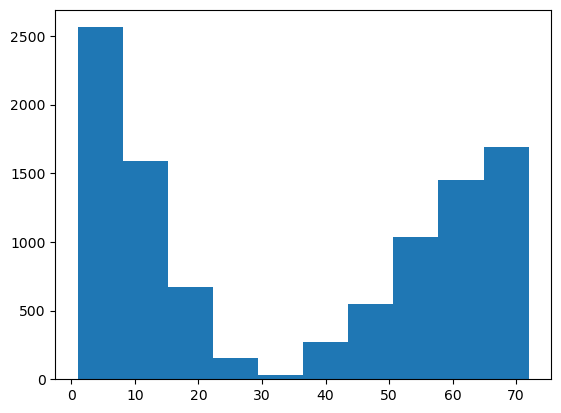

In [41]:
plt.hist(med_data['Initial_days'])

(array([1067.,  977.,  981.,  988.,  998.,  977.,  970., 1007.,  948.,
        1087.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

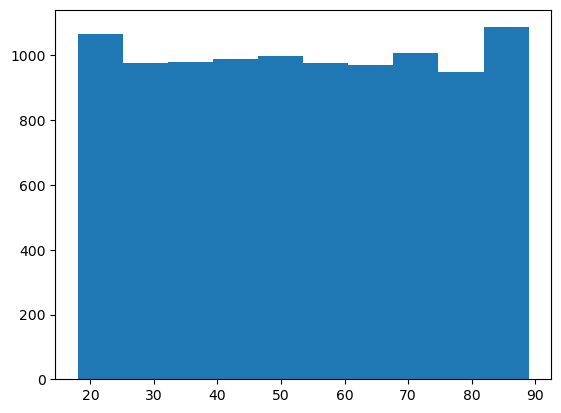

In [42]:
plt.hist(med_data['Age'])

(array([6.000e+00, 5.800e+01, 5.950e+02, 2.385e+03, 0.000e+00, 3.823e+03,
        2.436e+03, 6.340e+02, 6.100e+01, 2.000e+00]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

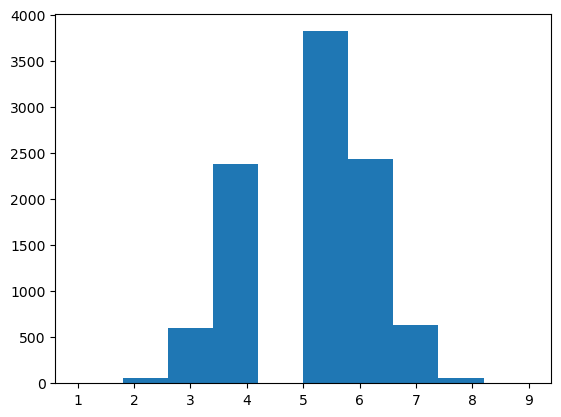

In [43]:
plt.hist(med_data['Doc_visits'])

(array([   4.,   69.,  498., 1677., 3085., 2769., 1450.,  393.,   51.,
           4.]),
 array([ 9.806483  , 11.46527957, 13.12407614, 14.78287271, 16.44166928,
        18.10046585, 19.75926243, 21.418059  , 23.07685557, 24.73565214,
        26.39444871]),
 <BarContainer object of 10 artists>)

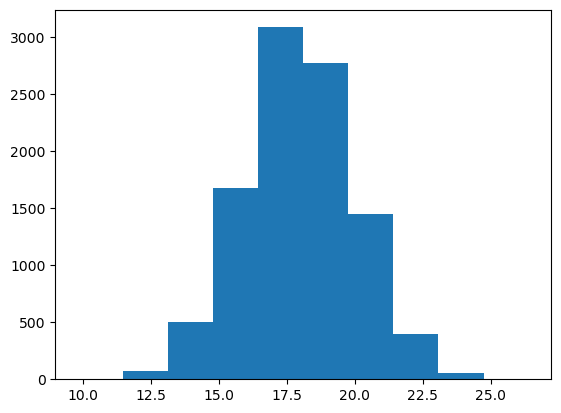

In [44]:
plt.hist(med_data['VitD_levels'])

(array([6.702e+03, 0.000e+00, 2.684e+03, 0.000e+00, 5.440e+02, 0.000e+00,
        6.400e+01, 0.000e+00, 5.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

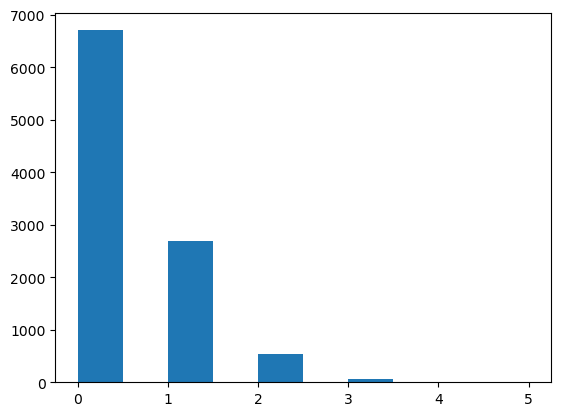

In [45]:
plt.hist(med_data['vitD_supp'])

(array([3.715e+03, 3.615e+03, 1.856e+03, 0.000e+00, 6.120e+02, 1.690e+02,
        0.000e+00, 2.500e+01, 6.000e+00, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

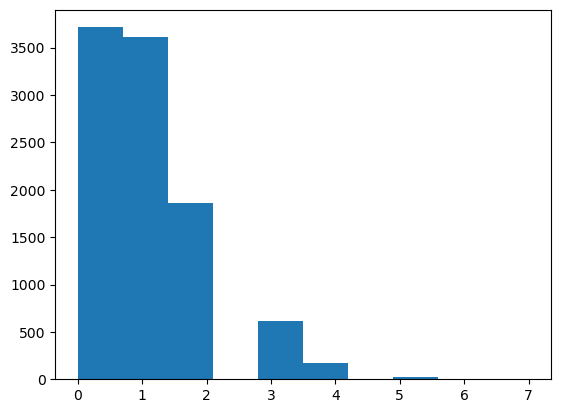

In [46]:
plt.hist(med_data['Full_meals_eaten'])

(array([5910.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4090.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

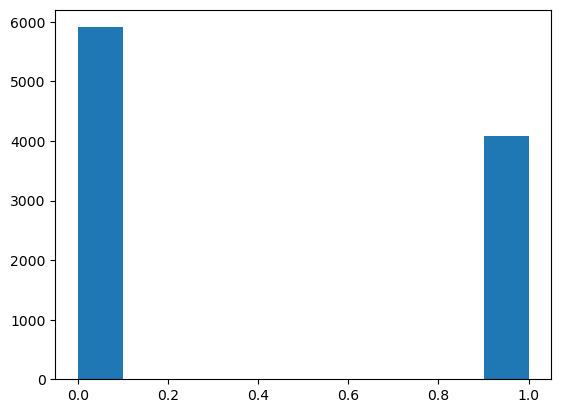

In [47]:
plt.hist(med_data['HighBlood'])

(array([2906.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7094.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

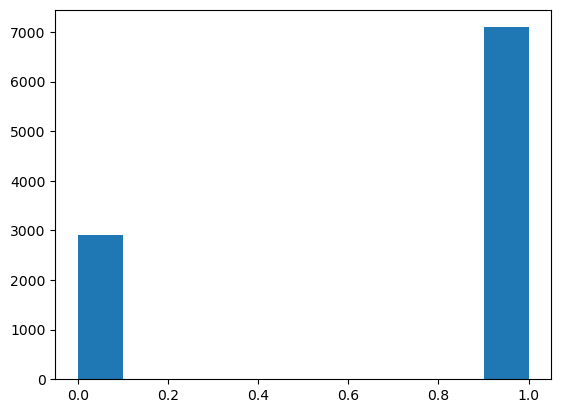

In [48]:
plt.hist(med_data['Overweight'])

(array([6785.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3215.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

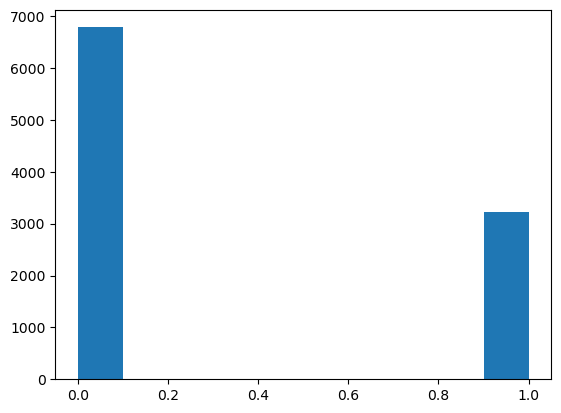

In [49]:
plt.hist(med_data['Anxiety'])

(array([5865.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4135.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

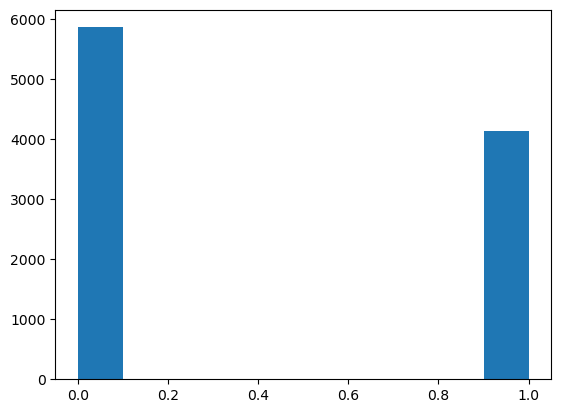

In [50]:
plt.hist(med_data['Reflux_esophagitis'])

(array([5886.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4114.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

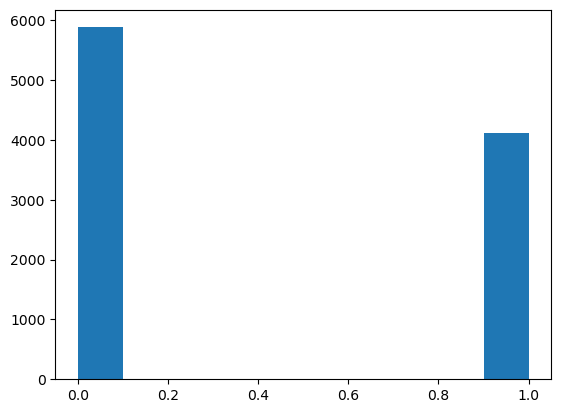

In [51]:
plt.hist(med_data['BackPain'])

(array([6628.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

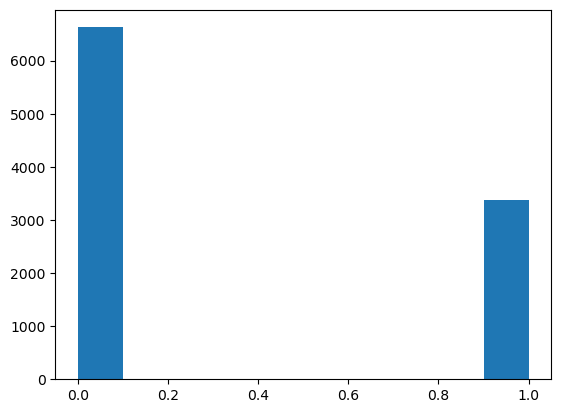

In [52]:
plt.hist(med_data['Hyperlipidemia'])

(array([8007.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1993.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

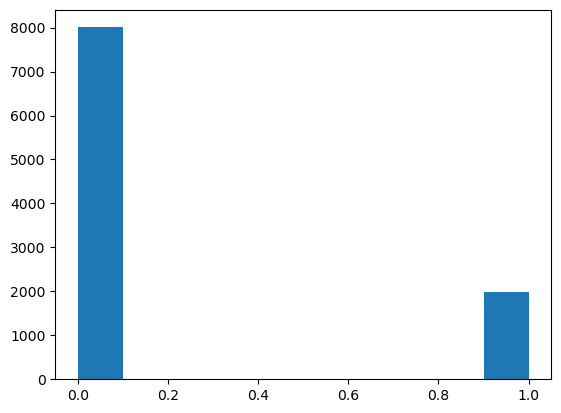

In [53]:
plt.hist(med_data['Stroke'])

(array([6426.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3574.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

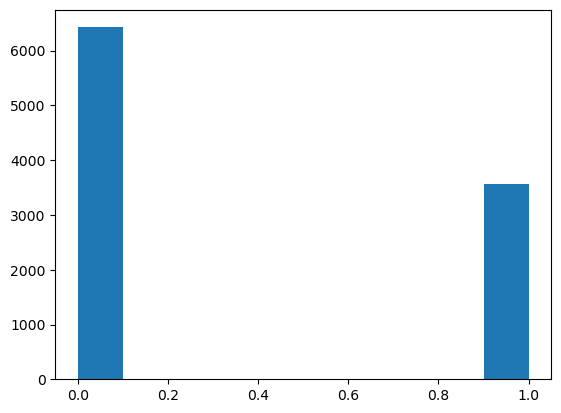

In [54]:
plt.hist(med_data['Arthritis'])

### Performing Bivariate Analysis

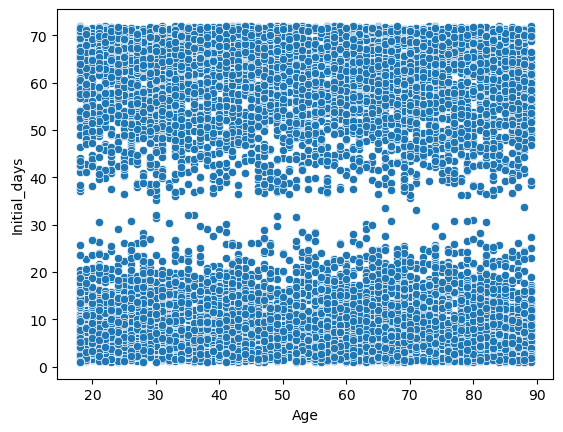

In [55]:
# Initial_days and Age
sns.scatterplot(x=med_data['Age'], y=med_data['Initial_days'])
plt.show();

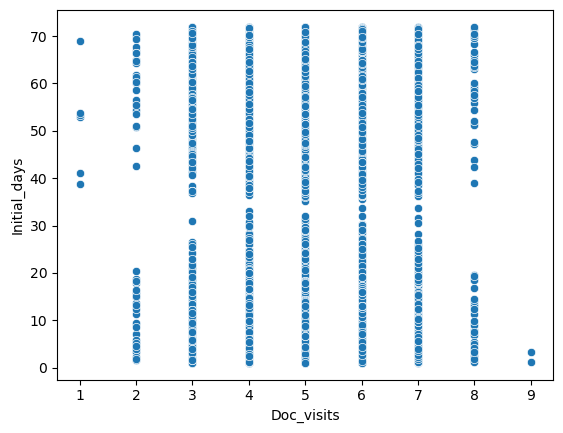

In [56]:
# Initial_days and Doctor Visits
sns.scatterplot(x=med_data['Doc_visits'], y=med_data['Initial_days'])
plt.show();

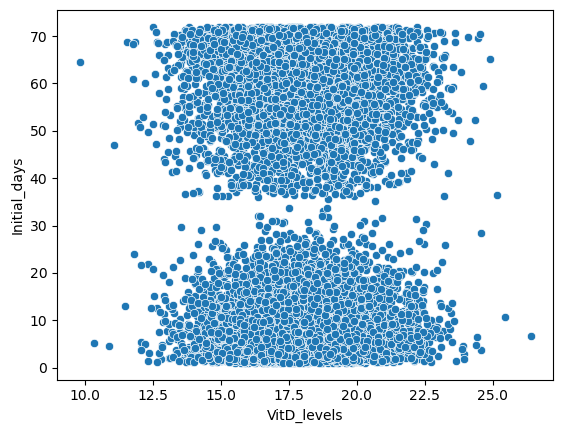

In [57]:
# Initial_days and Vitamin D Levels
sns.scatterplot(x=med_data['VitD_levels'], y=med_data['Initial_days'])
plt.show();

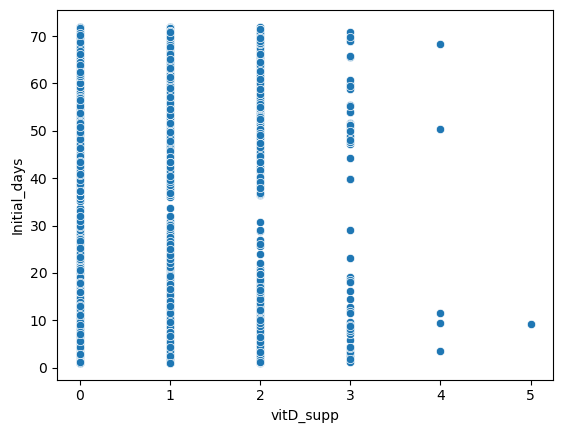

In [58]:
# Initial_days and Vitamin D Supplements
sns.scatterplot(x=med_data['vitD_supp'], y=med_data['Initial_days'])
plt.show();

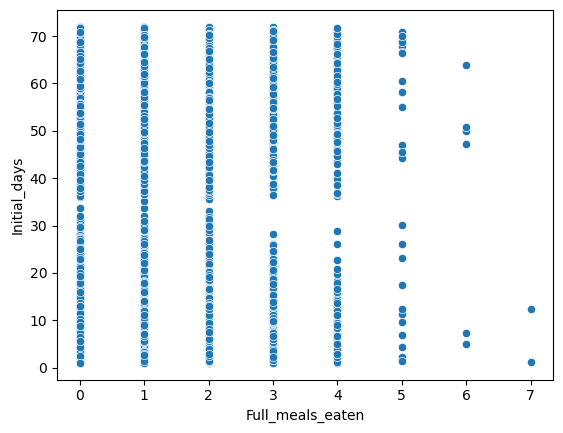

In [59]:
# Initial_days and Full Meals Eaten
sns.scatterplot(x=med_data['Full_meals_eaten'], y=med_data['Initial_days'])
plt.show();

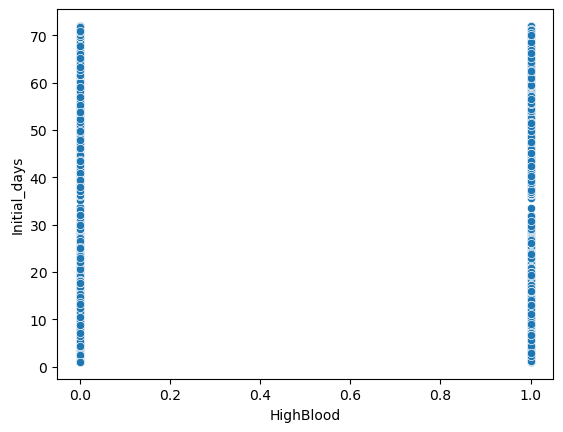

In [60]:
# Initial_days and High Blood Pressure
sns.scatterplot(x=med_data['HighBlood'], y=med_data['Initial_days'])
plt.show();

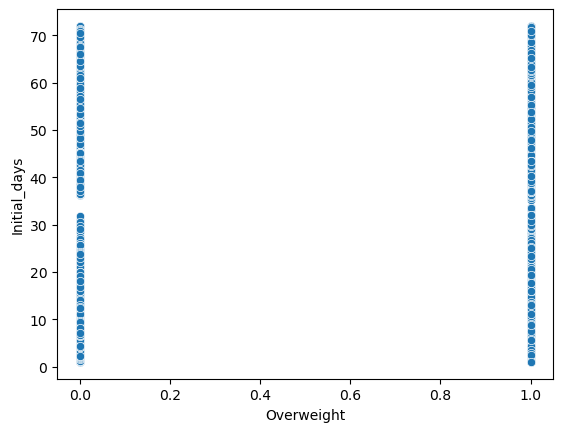

In [61]:
# Initial_days and Overweight
sns.scatterplot(x=med_data['Overweight'], y=med_data['Initial_days'])
plt.show();

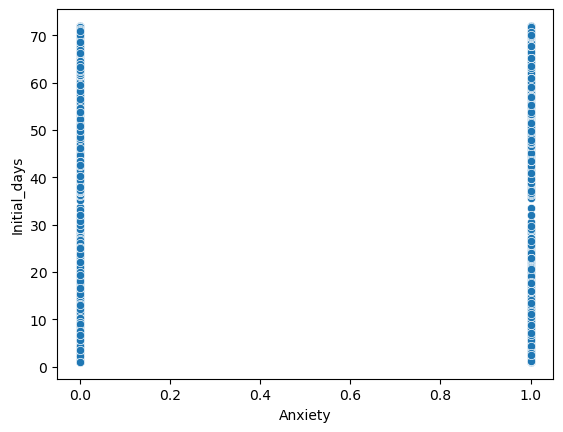

In [62]:
# Initial_days and Anxiety
sns.scatterplot(x=med_data['Anxiety'], y=med_data['Initial_days'])
plt.show();

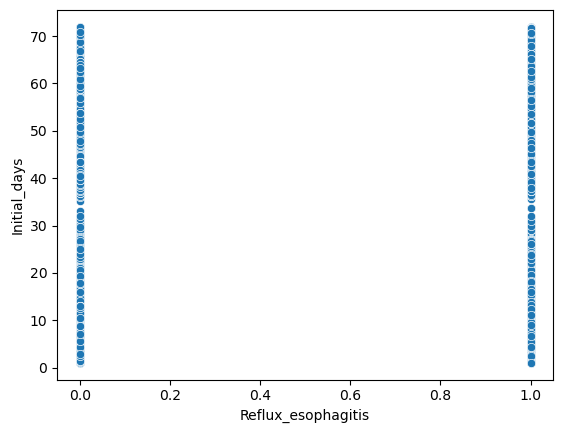

In [63]:
# Initial_days and Reflux Esophagitis
sns.scatterplot(x=med_data['Reflux_esophagitis'], y=med_data['Initial_days'])
plt.show();

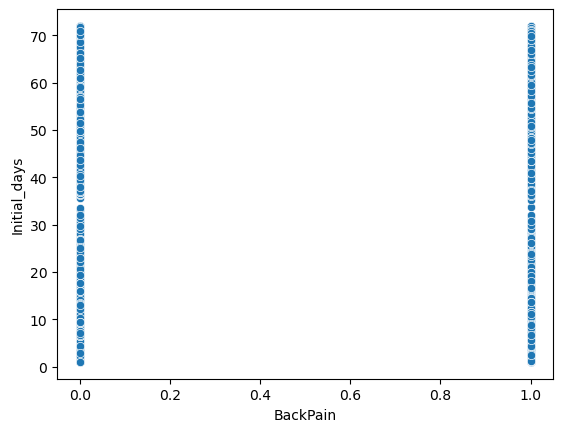

In [64]:
# Initial_days and Back Pain
sns.scatterplot(x=med_data['BackPain'], y=med_data['Initial_days'])
plt.show();

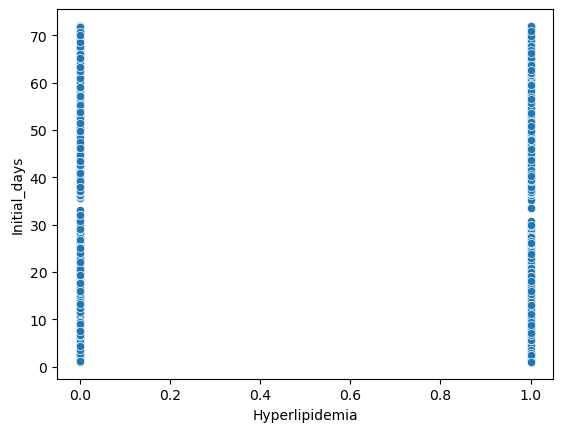

In [65]:
# Initial_days and Hyperlipidemia
sns.scatterplot(x=med_data['Hyperlipidemia'], y=med_data['Initial_days'])
plt.show();

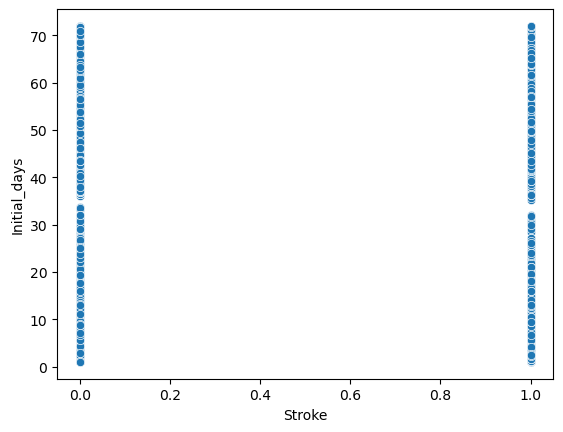

In [66]:
# Initial_days and Stroke
sns.scatterplot(x=med_data['Stroke'], y=med_data['Initial_days'])
plt.show();

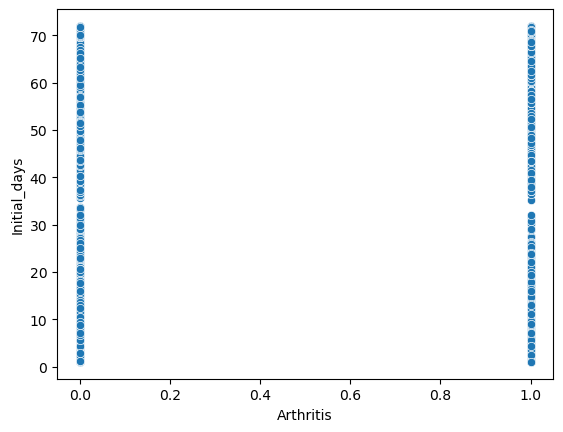

In [67]:
# Initial_days and Arthritis
sns.scatterplot(x=med_data['Arthritis'], y=med_data['Initial_days'])
plt.show();

## C5. Prepared Dataset CSV File
Please see the CSV file that is also being submitted as part of this task submission.

In [68]:
mlr_df = med_data[['Initial_days', 'Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis']]

mlr_df.to_csv('/Users/astro/Downloads/mlr_dataset.csv', index=False)

# Part IV: Model Comparison and Analysis

## D1. The Initial MLR Model (Source: Mark Keith and D208 Course Textbook)

In [69]:
y = mlr_df.Initial_days
x = mlr_df[['Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Stroke', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.529
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0984
Time:                        11:58:39   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9986   BIC:                         9.389e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0204      0

## D2. Feature Selection/Model Evaluation and D3. The Reduced Model
By assessing the outcome of the initial MLR model, we can see that the R-squared is remarkably low (indicating that the model is not a good fit). 
I will reduce the model with the Backward Stepwise elimination method until we are left with only the statistically significant variables. I will begin by removing the variables one by one by selecting the highest p-value variable for removal. In this case, the highest p-value is the Stroke variable. We will use the significance level of 15% (or equal to or less than 0.150 p-values) for the purposes of this model.

In [70]:
y = mlr_df.Initial_days
x = mlr_df[['Age', 'Doc_visits', 'VitD_levels', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.654
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0702
Time:                        11:58:39   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9987   BIC:                         9.388e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0204      0

In [71]:
# The next highest p-value is VitD_levels, so it will be removed.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Hyperlipidemia', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.797
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0488
Time:                        11:58:39   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9988   BIC:                         9.387e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0203      0

In [72]:
# The next highest p-value is Hyperlipidemia, so it will be removed.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten', 'HighBlood',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.959
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0335
Time:                        11:58:39   Log-Likelihood:                -46878.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9989   BIC:                         9.386e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0203      0

In [73]:
# The next highest p-value is HighBlood, so it will be removed.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'Doc_visits', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.133
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0236
Time:                        11:58:39   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9990   BIC:                         9.385e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0202      0

In [74]:
# The next highest p-value is Doc_visits, so it will be removed.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'vitD_supp', 'Full_meals_eaten',
              'Overweight', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.340
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0165
Time:                        11:58:40   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9991   BIC:                         9.384e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0202      0

In [75]:
# The next highest p-value is Overweight, so it will be removed.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'vitD_supp', 'Full_meals_eaten', 'Anxiety', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.502
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0144
Time:                        11:58:40   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9992   BIC:                         9.383e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0203      0

In [76]:
# The next highest p-value is Anxiety, so it will be removed.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'vitD_supp', 'Full_meals_eaten', 'Reflux_esophagitis', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.692
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0130
Time:                        11:58:40   Log-Likelihood:                -46880.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9993   BIC:                         9.382e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                    0.0204      0

In [77]:
# The next highest p-value is Reflux_esophagitis, so it will be removed.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'vitD_supp', 'Full_meals_eaten', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.939
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0118
Time:                        11:58:40   Log-Likelihood:                -46881.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9994   BIC:                         9.382e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0201      0.013  

In [78]:
# Here we can see that all of the rest of the variables are statistically significant given our level of 15%.
# This is the final reduced model.
y = mlr_df.Initial_days
x = mlr_df[['Age', 'vitD_supp', 'Full_meals_eaten', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.939
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0118
Time:                        11:58:40   Log-Likelihood:                -46881.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9994   BIC:                         9.382e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0201      0.013  

## E1. Explanation of the Data Analysis Process
Here, we can see that comparing the initial MLR model and a reduced model is helpful because all of the remaining variables in the reduced model are statistically significant by 15%.

## E2. Output and Calculations of the Analysis
Please see the residual plots and the RSME for the reduced MLR model below.

## E3. Copy of the Python Code
Please see the Python Jupyter Notebook that is also being submitted as part of this task submission.

### Residual Plots (Source: Geeks for Geeks)

eval_env: 1


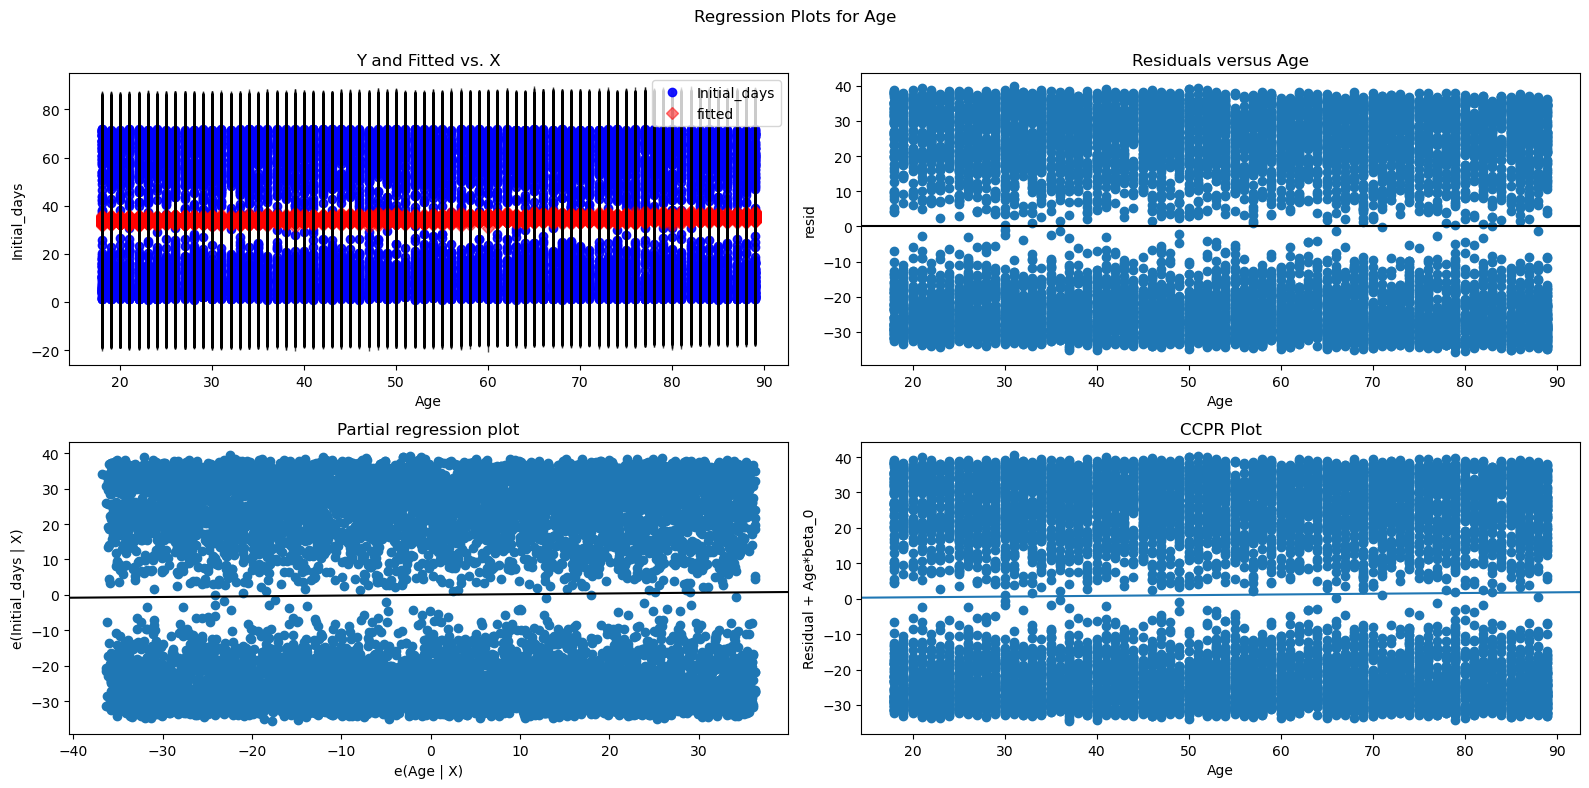

In [79]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Age', fig=fig);

eval_env: 1


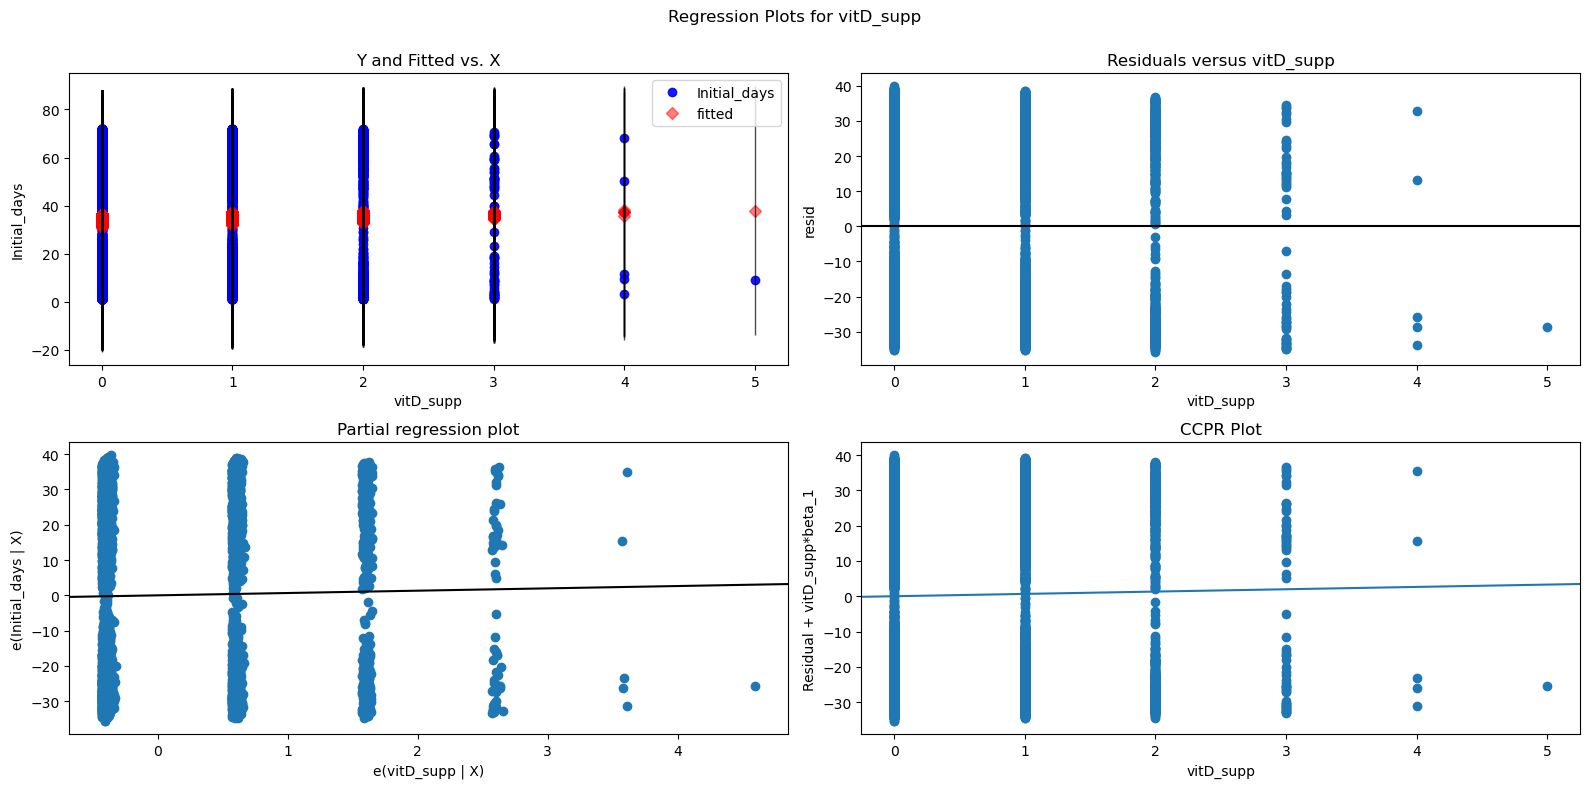

In [80]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'vitD_supp', fig=fig);

eval_env: 1


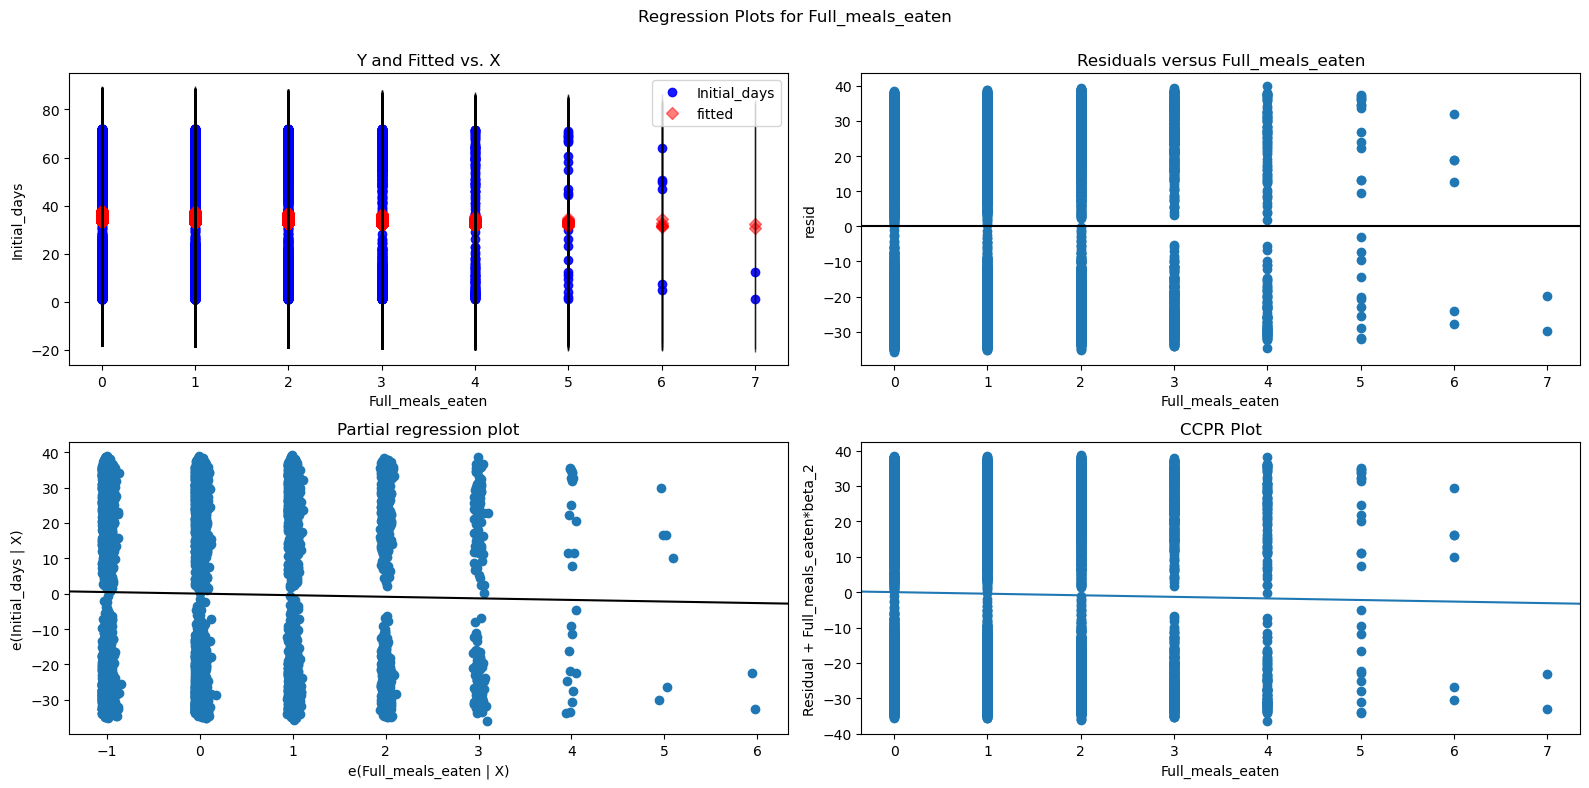

In [81]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Full_meals_eaten', fig=fig);

eval_env: 1


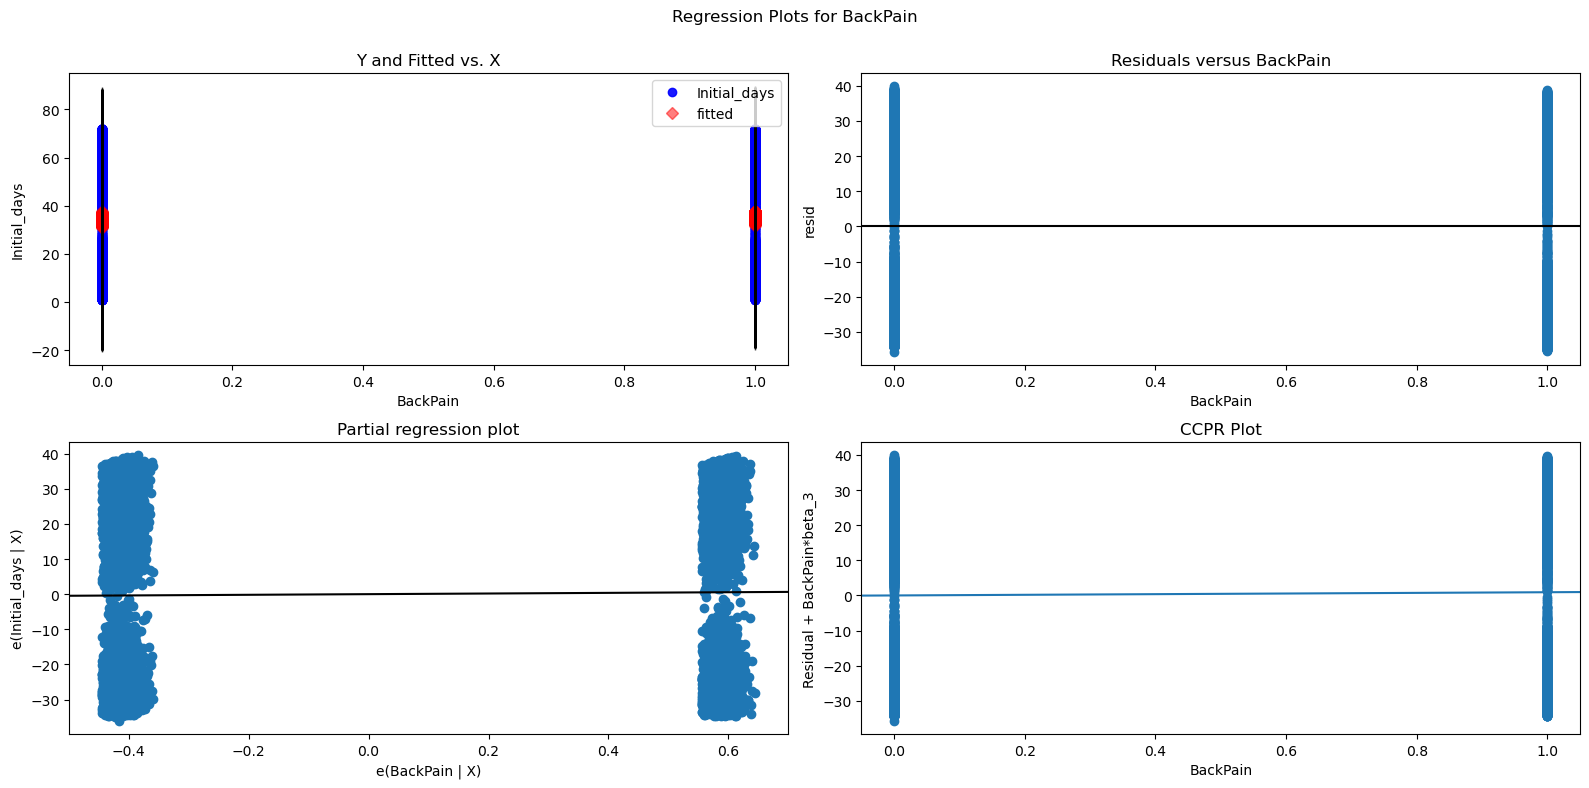

In [82]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'BackPain', fig=fig);

eval_env: 1


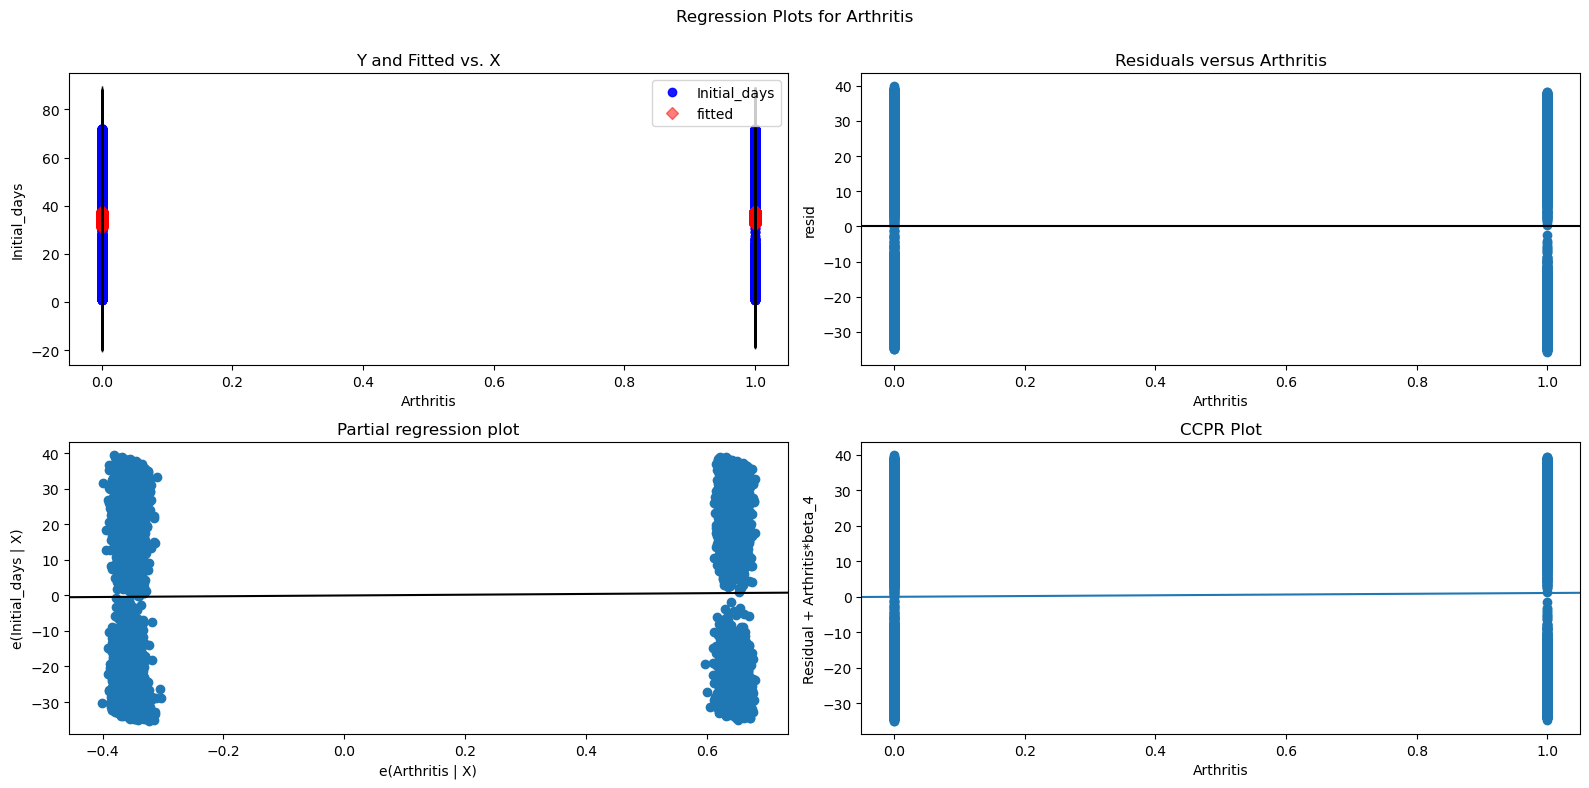

In [83]:
fig = plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Arthritis', fig=fig);

In [84]:
y = mlr_df.Initial_days
x = mlr_df[['Age', 'vitD_supp', 'Full_meals_eaten', 
              'BackPain', 'Arthritis']].assign(const=1)

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.939
Date:                Thu, 08 Feb 2024   Prob (F-statistic):             0.0118
Time:                        11:59:06   Log-Likelihood:                -46881.
No. Observations:               10000   AIC:                         9.377e+04
Df Residuals:                    9994   BIC:                         9.382e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Age                  0.0201      0.013  

### Residual Standard Error (Source: D208 Course Webinars)

A lower residual standard error is generally better. Here, we can see that our residual standard error is 26, which is not necessarily considered particularly good.

In [85]:
results.resid.std(ddof=x.shape[1])

26.296592872388086

# Part V: Data Summary and Implications
## F1. Results of the Analysis

Model Equation:

$$
\hat{y} = 32.8033 + 1.0714(Arthritis) + 0.9162(Back Pain) - 0.4448(Full Meals Eaten) - 0.6595(Vitamin D Supplements) + 0.0201(Age)
$$

Interpretation of Coefficients:

- Keeping all other things constant, patients with arthritis spend 1.0714 more initial days hospitalized.
- Keeping all other things constant, patients who have back pain spend 91.62% more initial days hospitalized.
- Keeping all other things constant, a one unit increase in full meals eaten equates to 44.48% fewer initial days hospitalized.
- Keeping all other things constant, a one unit increase in vitamin d supplementation results in 65.95% fewer intiial days hospitalized.
- Keeping all other things constant, a one unit increase in age results in 2.01% more initial days hospitalized.

Given everything about this MLR, we have determined that the five variables of statistical significance (15%) are arthritis, back pain, full meals eaten, vitamin d supplementation, and age.

The limitations of the data analysis is the availability of variables to test. For example, perhaps if we had more applicable variables our outcome could be better. Another limitation is that there are only 10,000 records in this dataset, which is somewhat small. Finally, the last limitation is the data is only for a certain amount of time - if there was more data over a greater period of time, we might have more information and a better outcome.

## F2. Recommended Course of Action

It is my recommended course of action that a different set of variables could be analyzed instead since we only have five significant variables for this one. Another MLR could be built from the ground up, and, while the research question (to analyze which factors influence the length of initial hospitalization) can perhaps remain the same, the independent variables should be different. Suffice it to say, however, this exercise was not a waste of resources as we have determined statistical significance of five variables. 

It would also be prudent to examine these five variables in greater depth so as to aid the company/institution for which we have performed this MLR to determine ways to decrease the length of initial hospitalization by way of addressing the prevalence of these variables. For example, we may want to look into preventive measures for back pain for patients since it results in a 91.62% increase in initial days hospitalized, or look further into the effects of vitamin d supplementation since it results in a 65.95% decrease in initial days hospitalized, etc.